In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
import seis_nn
import cupy as cp
import seis_diagnostics
import seis_model

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [2]:
data=kgs.load_all_train_data()
data = data[6000:8000][::100]
np.random.default_rng(seed=0).shuffle(data)

4901
1073
1073
4901
4901
capturing graph


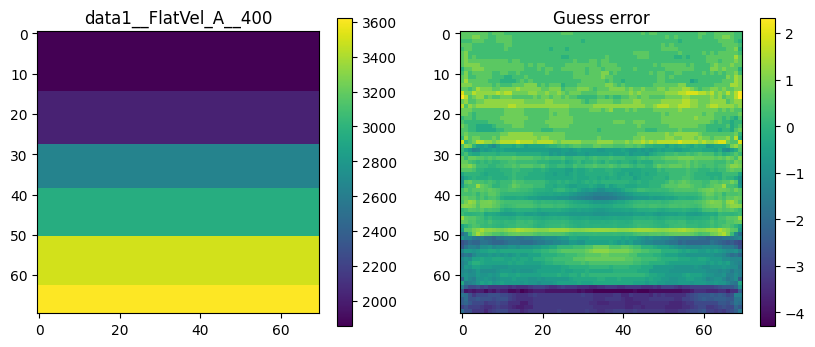

Guess error:  0.8245623903858418
diag 3.3855479104998025e-05
capturing graph
1 4822079472.579806
2 564578657.2129917
3 756183613.0467961
4 1862255266.5823672
5 1118624905.5375612
6 93984213.6726114
7 178392327.4271097
8 346754811.64986736
9 431515872.69661266
10 246024334.78074953
11 30564142.05117748
12 37920020.111567035
13 69856698.99388406
14 99097486.79135035
15 93161166.7673878
16 87667592.26853608
17 53664673.24766497
18 26481072.91223018
19 23654403.958702326
20 40102523.64626514
21 28644123.88248186
22 8784333.36063085
23 12580853.245378325
24 16126119.928925842
25 13476720.460202504
26 8231613.131472878
27 3944098.807800092
28 11441254.833163636
29 6361534.275855397
30 2382901.6551967696
31 7242357.862436245
32 7614941.948287471
33 10364330.85833169
34 23157487.352585092
35 21609767.718619067
36 5354403.543832901
37 6307386.304238067
38 10814340.001920875
39 7741113.986264819
40 2048546.9888143458
41 4924081.596606453
42 8336333.953574283
43 7489655.924726854
44 3509212.79843

In [ ]:
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_model)

model = seis_model.default_model().models[1].model_FlatVel
model.show_convergence=True
model.use_new_bfgs = True
#model.iter_list = [1000]
model.lbfgs_tolerance_change = 10**-9
model.lbfgs_tolerance_grad = 10**-7

do_which_list = [False,False,True]

def param_func(model,value):
    #model.prior.λ = 10**value
    return model
param_values = [0]
#param_values = np.linspace(-8,-8,1)
param_name = "dummy"

for d in data:
    seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name);